Import Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE



Load The Dataset

In [47]:
df=pd.read_csv('cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


Describe The DataSet

In [48]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [49]:
df.dtypes

,0
Dimensions.Height,int64
Dimensions.Length,int64
Dimensions.Width,int64
Engine Information.Driveline,object
Engine Information.Engine Type,object
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,int64
Engine Information.Transmission,object
Fuel Information.City mpg,int64
Fuel Information.Fuel Type,object


In [50]:
df.ndim

2

In [51]:
df.shape

(5076, 18)

List of The Numerical Variables

In [52]:
numerical_coloumns=df.select_dtypes(include=np.number).columns
numerical_coloumns

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

List Of The Categorical Variables

In [53]:
categorical_variables=df.select_dtypes(include='object').columns
categorical_variables

Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Transmission', 'Fuel Information.Fuel Type',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year'],
      dtype='object')

Missing Value

In [54]:
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


DUPLICATED ROWS

In [55]:
print('duplicated_rows=',df.duplicated().sum())


duplicated_rows= 18


HANDLING DUPLICATES

In [56]:
df.drop_duplicates(inplace=True)
print('duplicated_rows=',df.duplicated().sum())

duplicated_rows= 0


OUTLIERS

In [57]:
Q1=df[numerical_coloumns].quantile(0.25)
Q3=df[numerical_coloumns].quantile(0.75)
IQR=Q3-Q1
LB= Q1 - 1.5 ** IQR
UB= Q3 + 1.5 ** IQR
outlier=(df[numerical_coloumns]< (LB)) | (df[numerical_coloumns] > (UB))
outlier.sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Number of Forward Gears,91
Fuel Information.City mpg,3
Fuel Information.Highway mpg,1
Identification.Year,0
Engine Information.Engine Statistics.Horsepower,0
Engine Information.Engine Statistics.Torque,0


HANDLING OF OUTLIERS

In [58]:
df.drop(df[outlier.any(axis=1)].index,inplace=True)
df.shape

(4963, 18)

HANDLING OF CATEGORICAL VARIABLES

In [59]:
df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
df_encoded.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Identification.Model Year_2012 Volkswagen Passat,Identification.Model Year_2012 Volkswagen Routan,Identification.Model Year_2012 Volkswagen Tiguan,Identification.Model Year_2012 Volvo C30,Identification.Model Year_2012 Volvo C70,Identification.Model Year_2012 Volvo S60,Identification.Model Year_2012 Volvo S80,Identification.Model Year_2012 Volvo XC60,Identification.Model Year_2012 Volvo XC70,Identification.Model Year_2012 Volvo XC90
0,140,143,202,True,6,18,25,2009,250,236,...,False,False,False,False,False,False,False,False,False,False
1,140,143,202,True,6,22,28,2009,200,207,...,False,False,False,False,False,False,False,False,False,False
2,140,143,202,True,6,21,30,2009,200,207,...,False,False,False,False,False,False,False,False,False,False
3,140,143,202,True,6,21,28,2009,200,207,...,False,False,False,False,False,False,False,False,False,False
5,91,17,62,True,6,16,27,2009,265,243,...,False,False,False,False,False,False,False,False,False,False


In [60]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()
le = LabelEncoder()

for col in categorical_variables:
    df_label_encoded[col] = le.fit_transform(df[col])

df_label_encoded.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,0,19,True,6,6,18,3,25,0,3,3,0,2009,250,236
1,140,143,202,2,13,True,6,6,22,3,28,0,1,3,0,2009,200,207
2,140,143,202,2,13,True,6,7,21,3,30,1,0,3,0,2009,200,207
3,140,143,202,0,13,True,6,6,21,3,28,0,2,3,0,2009,200,207
5,91,17,62,0,20,True,6,7,16,3,27,1,7,3,2,2009,265,243


In [61]:
df_label_encoded.dtypes

,0
Dimensions.Height,int64
Dimensions.Length,int64
Dimensions.Width,int64
Engine Information.Driveline,int64
Engine Information.Engine Type,int64
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,int64
Engine Information.Transmission,int64
Fuel Information.City mpg,int64
Fuel Information.Fuel Type,int64


FEATURE SCALING

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = [
    "Dimensions.Height",
    "Dimensions.Length",
    "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque"
]
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

In [63]:
print("Standardized Data:\n", df_standardized.head())

Standardized Data:
    Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0          -0.085637           0.195037          0.716604   
1          -0.085637           0.195037          0.716604   
2          -0.085637           0.195037          0.716604   
3          -0.085637           0.195037          0.716604   
5          -0.872852          -1.435632         -1.027929   

  Engine Information.Driveline                Engine Information.Engine Type  \
0              All-wheel drive          Audi 3.2L 6 cylinder 250hp 236ft-lbs   
1            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
2            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
3              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
5              All-wheel drive         Audi 3.2L 6 cylinder 265hp 243 ft-lbs   

   Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                       True                            

FEATURE SELECTION

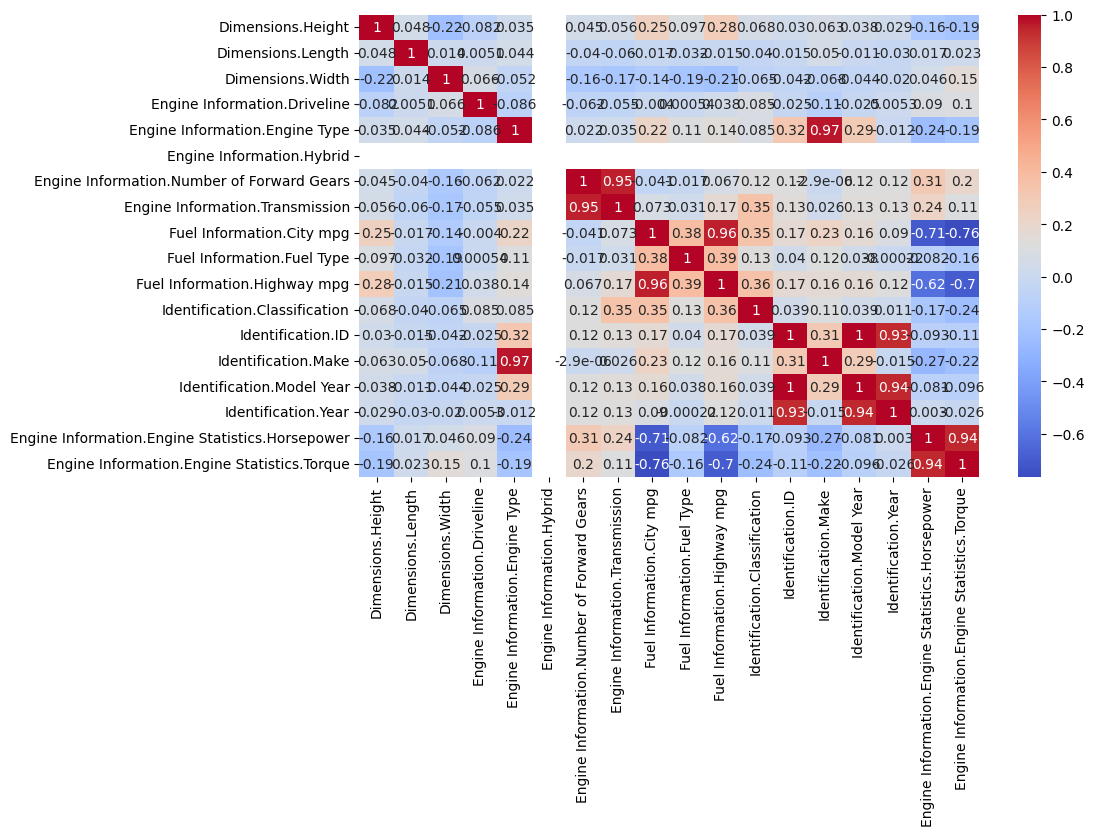

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df_label_encoded.corr(),annot=True,cmap='coolwarm')
plt.show()

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

X=df_label_encoded.drop(columns=['Engine Information.Engine Statistics.Torque'])
y=df_label_encoded['Engine Information.Engine Statistics.Torque']
ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Engine Information.Driveline',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification'],
      dtype='object')


LINEARITY

<Axes: xlabel='Engine Information.Engine Statistics.Horsepower', ylabel='Engine Information.Engine Statistics.Torque'>

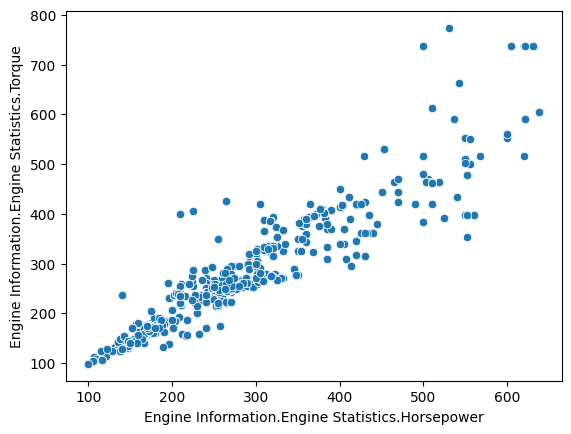

In [72]:
sns.scatterplot(x='Engine Information.Engine Statistics.Horsepower',y='Engine Information.Engine Statistics.Torque',data=df_label_encoded)

<Axes: xlabel='Engine Information.Driveline', ylabel='Engine Information.Engine Statistics.Torque'>

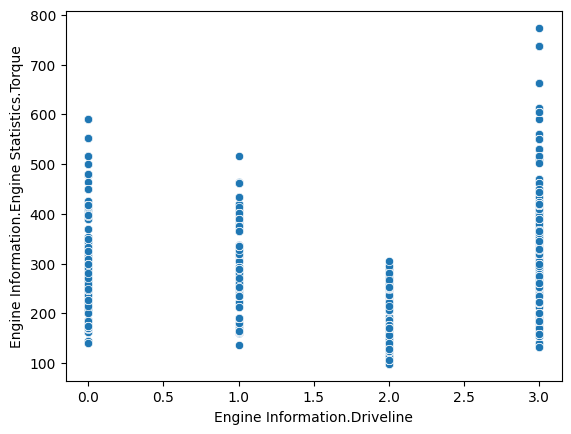

In [73]:
sns.scatterplot(x='Engine Information.Driveline',y='Engine Information.Engine Statistics.Torque',data=df_label_encoded)

<Axes: xlabel='PCA_Fuel_ModelYear', ylabel='Engine Information.Engine Statistics.Torque'>

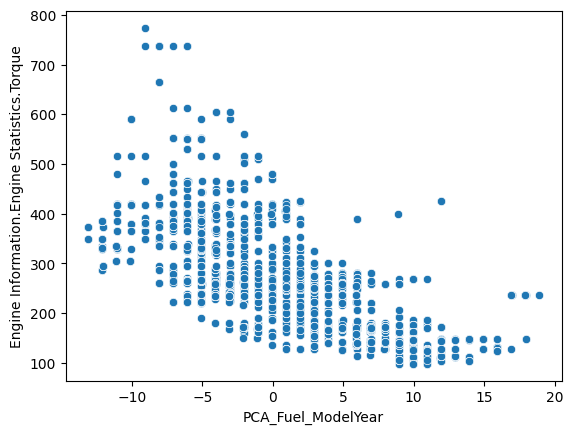

In [75]:
sns.scatterplot(x='PCA_Fuel_ModelYear', y='Engine Information.Engine Statistics.Torque', data=df_label_encoded)

MULTICOLLINEARITY

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
selected_features = ['Engine Information.Driveline',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification']
X = df_label_encoded[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                      Feature        VIF
0                Engine Information.Driveline   3.901348
1  Engine Information.Number of Forward Gears  31.405407
2                  Fuel Information.Fuel Type  48.740646
3                Fuel Information.Highway mpg  23.454439
4               Identification.Classification   1.469997


DIMENTIONALITY REDUCTION

In [68]:
from sklearn.decomposition import PCA
# Extract features with high VIF
# Remove extra space in 'Fuel Information.Highway mpg '
high_vif_features = ['Engine Information.Number of Forward Gears','Fuel Information.Fuel Type','Fuel Information.Highway mpg']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df_label_encoded[high_vif_features])

# Create a new column in the DataFrame for the PCA component
df_label_encoded['PCA_Fuel_ModelYear'] = X_pca

# Drop the original correlated features
df_label_encoded = df_label_encoded.drop(columns=high_vif_features)

print("Transformed DataFrame with PCA feature added:")
df_label_encoded.head()

Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Transmission,Fuel Information.City mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,PCA_Fuel_ModelYear
0,140,143,202,0,19,True,6,18,0,3,3,0,2009,250,236,0.943402
1,140,143,202,2,13,True,6,22,0,1,3,0,2009,200,207,3.942609
2,140,143,202,2,13,True,7,21,1,0,3,0,2009,200,207,5.942080
3,140,143,202,0,13,True,6,21,0,2,3,0,2009,200,207,3.942609
5,91,17,62,0,20,True,7,16,1,7,3,2,2009,265,243,2.942873


In [69]:
# VIF after PCA on selected features

X = df_label_encoded[['Identification.Classification', 'Engine Information.Driveline', 'PCA_Fuel_ModelYear']]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,Identification.Classification,1.417073
1,Engine Information.Driveline,1.279226
2,PCA_Fuel_ModelYear,1.131322


MODEL TRAINING

In [76]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)



MODEL EVALUATION

In [77]:
r2=r2_score(y_test,y_pred)
print('R-square:',r2)

R-square: 0.9239474889787682


In [79]:
err=y_test-y_pred
err

,Engine Information.Engine Statistics.Torque
4678,-18.241984
409,30.246634
1201,-20.868052
4419,21.043929
767,-10.561031
...,...
443,11.496106
96,-12.258715
4745,-8.431578
3104,-15.193243


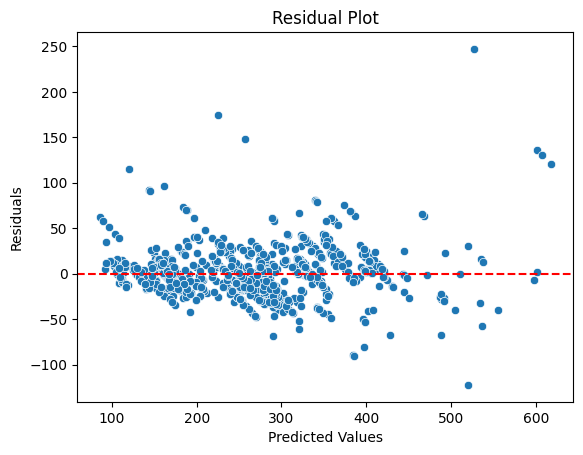

In [80]:
sns.scatterplot(x=y_pred,y=err)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()